# TensorFlow / Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

In [10]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white')

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [11]:
# data frame with the information of the data
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [12]:
# create a function that gives us the description of the columns so that we can use along the exercise
def get_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [13]:
# check the description of loan amount
get_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [14]:
# load the real data set
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

## 1. Exploratory Data Analysis

In [15]:
# check the data
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [16]:
# check the information on the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [17]:
# general statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


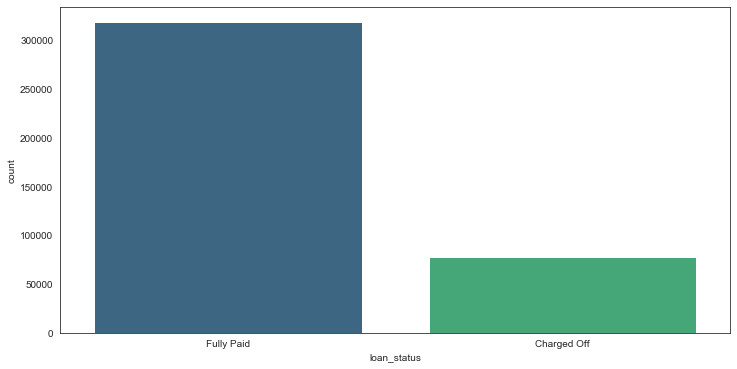

In [18]:
# see how our target class is distributed
plt.figure(figsize=(12, 6))
sns.countplot(df['loan_status'], palette='viridis')

We can understand that we are dealing with a pretty unbalanced class data set, since the majority of the loans were fully paid.

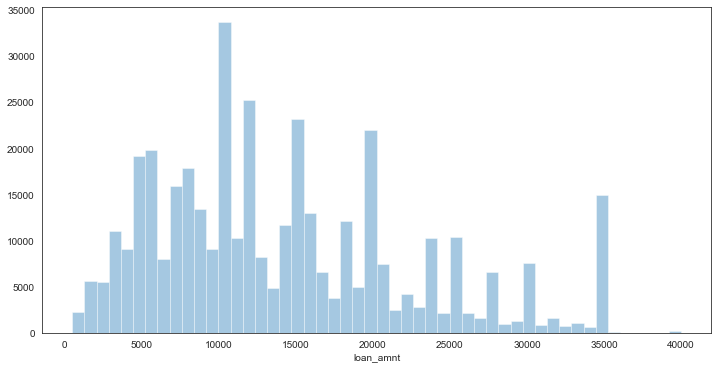

In [19]:
# see how the loan amount variables is distributed
plt.figure(figsize=(12, 6))
sns.distplot(df['loan_amnt'], kde = False)

We can understand that the majority of the loan amounts were range from 5K and 20K. However we also have some outliers in the data set - 40K

In [20]:
# check the correlation between features
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


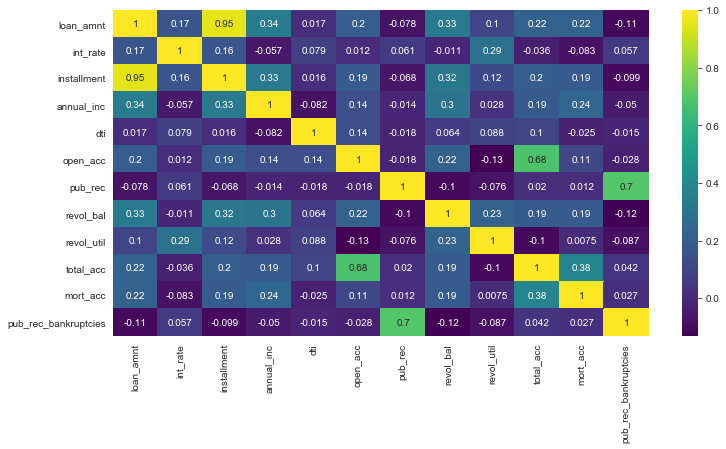

In [21]:
# plot the correlation on a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

We can conclude that the loan amount and the installment are highly correlated. It makes sense that higher loan amounts result in a higher installments. We may decide to drop one of these variables since they give us almost the same information, and would be only adding complexity to our model.

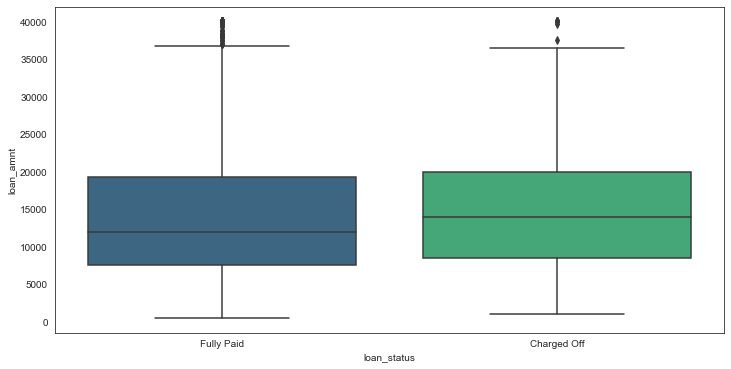

In [22]:
# understand if the loan amount is a good predictor
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df, palette='viridis')

Generally speaking there's not a big difference between the loan amount from the paid loans and the defaulted ones.

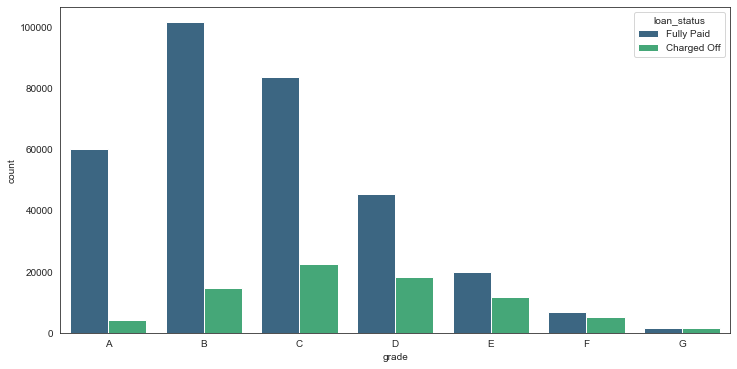

In [23]:
# take a look at the grade feature
plt.figure(figsize=(12, 6))
sns.countplot(x = 'grade', hue = 'loan_status', data = df, 
              order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], palette='viridis')

We can conclude that higher the grade (A-G) higher the proportion of charged off loans. What about the sub-grade?

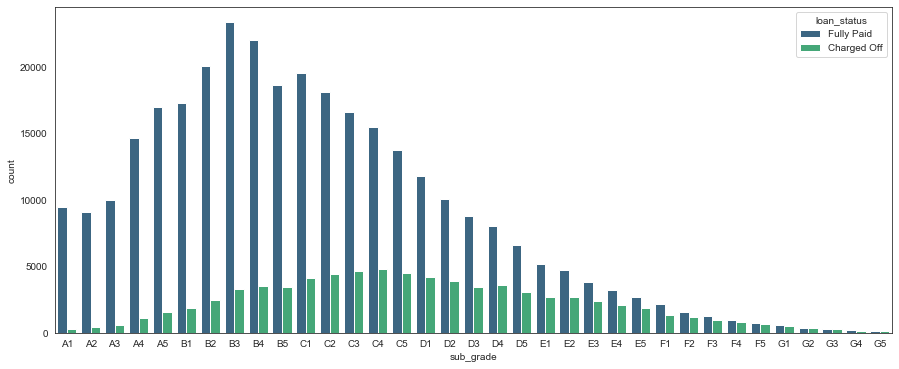

In [24]:
# take a look at the sub_grade feature
plt.figure(figsize=(15, 6))
sns.countplot(x = 'sub_grade', hue = 'loan_status', data = df, palette='viridis',
             order = ['A1','A2','A3','A4','A5',
                        'B1','B2','B3','B4','B5',
                        'C1','C2','C3','C4','C5',
                        'D1','D2','D3','D4','D5',
                        'E1','E2','E3','E4','E5',
                        'F1','F2','F3','F4','F5',
                        'G1','G2','G3','G4','G5'])

We can conclude that the sub-grade variable is just a more granular version of the grade varible. So higher the sub-grade higher the probability of default. Seems that Grade F and G are not fully paid often. Let's isolate those to have a closer look.

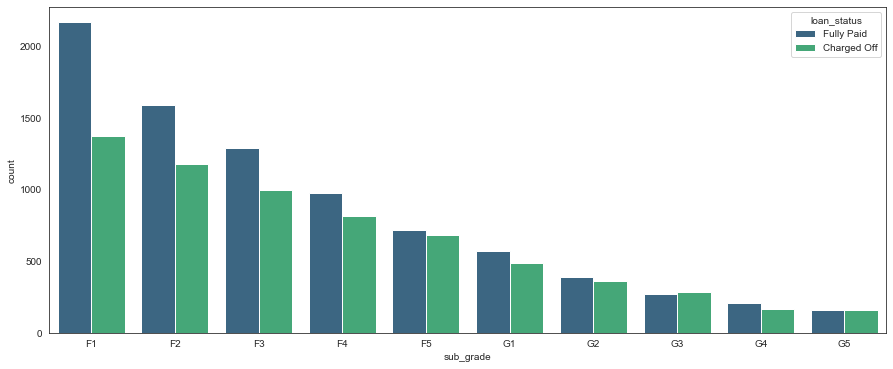

In [25]:
# take a look at the F and G sub_grades
df_g_f = df[(df['grade'] == 'F') | (df['grade'] == 'G')]

# take a look at the sub_grade feature
plt.figure(figsize=(15, 6))
sns.countplot(x = 'sub_grade', hue = 'loan_status', data = df_g_f, palette='viridis',
             order = ['F1','F2','F3','F4','F5',
                        'G1','G2','G3','G4','G5'])

In [26]:
# now let's create a binary variable to use as a target variable
df['paid_loan'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

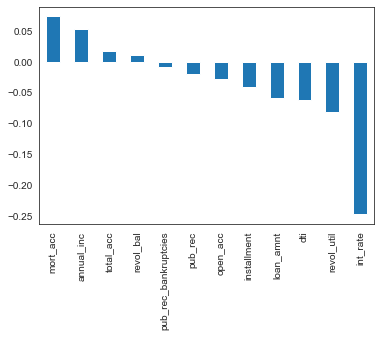

In [27]:
# now that we have our target variable in a numeric format let's check the correlation
df.corr()['paid_loan'][:-1].sort_values(ascending=False).plot(kind='bar')

We can conclude that the Interest Rate is significantly correlated with the our dependent variables (inversely) - lower the interest rate higher the probability that the loan will be fully paid. Aditionally, the number of mortage accounts and annual income also appear to be correlated.

## 2. Data Preprocessing

In [28]:
# first we will drop the variable loan_status since we already created a binary variables witht the same information
df = df.drop('loan_status', axis = 1)

### Missing data

In [29]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
paid_loan                   0
dtype: int64

In [30]:
# let's see the weight of each missing variable in the entire data set
round(((df.isnull().sum() / len(df))*100), 2).sort_values(ascending=False).head()

mort_acc                9.54
emp_title               5.79
emp_length              4.62
title                   0.44
pub_rec_bankruptcies    0.14
dtype: float64

We seem to have missing values on the following variables:
    - Employment title
    - Employment length
    - Title
    - Revolving line utilization rate
    - Mortgage accounts
    - Public record bankruptcies

#### Employment Title

In [31]:
# investigate hou many unique values we have for the Employment title
df['emp_title'].nunique()

173105

In [32]:
# take a look at the employment title column
df['emp_title'].value_counts().sort_values(ascending=False).head(20)

Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
Sales                       1638
Project Manager             1505
Owner                       1410
Driver                      1339
Office Manager              1218
manager                     1145
Director                    1089
General Manager             1074
Engineer                     995
teacher                      962
driver                       882
Vice President               857
Operations Manager           763
Administrative Assistant     756
Accountant                   748
Name: emp_title, dtype: int64

Seems that the employment title has 173K unique values. This variable seems to be too granular for us to extract some information from it. Let's decide to drop it.

In [33]:
# drop the employment title variable
df = df.drop('emp_title', axis = 1)

#### Employment Length

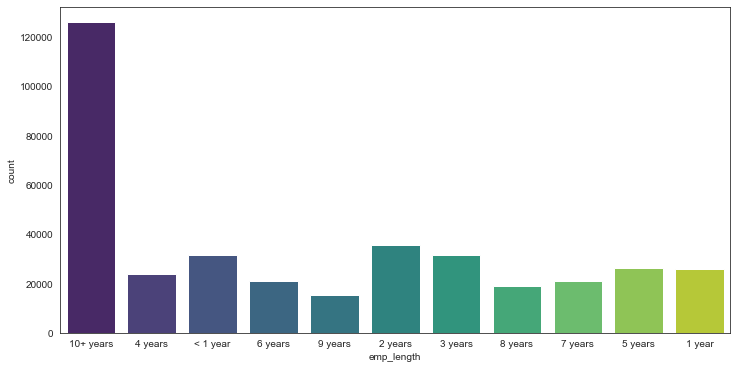

In [34]:
# understand how the employment length is distributed
plt.figure(figsize=(12, 6))
sns.countplot(df['emp_length'], palette='viridis')

In [35]:
# take a look at the records that have the missing value
df[df['emp_length'].isnull()].head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,paid_loan
35,5375.0,36 months,13.11,181.39,B,B4,NaN,RENT,34000.0,Verified,May-2013,credit_card,Pay Off Credit Card,26.12,Apr-1998,9.0,1.0,14998.0,88.7,20.0,f,INDIVIDUAL,5.0,1.0,"23617 Michael Viaduct\nWest John, MS 05113",1
36,3250.0,36 months,16.78,115.52,C,C5,NaN,RENT,22500.0,Verified,Aug-2013,debt_consolidation,Cover,18.76,Jun-2009,7.0,0.0,7587.0,54.6,7.0,f,INDIVIDUAL,0.0,0.0,"361 Erica Forest\nLake Mariaton, TN 30723",0
49,15000.0,36 months,7.89,469.29,A,A5,NaN,MORTGAGE,90000.0,Verified,Apr-2016,debt_consolidation,Debt consolidation,11.75,Aug-1994,7.0,0.0,8205.0,93.2,18.0,w,INDIVIDUAL,6.0,0.0,"84009 David Stream\nSouth Nicolehaven, IL 05113",1
58,10000.0,36 months,17.56,359.33,D,D1,NaN,MORTGAGE,32000.0,Verified,Jul-2013,debt_consolidation,debt consolidation,9.83,Sep-2006,6.0,0.0,11615.0,82.4,7.0,w,INDIVIDUAL,0.0,0.0,"965 Spencer Courts\nPacetown, AZ 00813",1
91,30225.0,60 months,18.24,771.47,D,D5,NaN,MORTGAGE,65800.0,Verified,Aug-2014,debt_consolidation,Debt consolidation,23.87,Mar-1999,11.0,0.0,14390.0,69.5,31.0,w,INDIVIDUAL,1.0,0.0,"493 Michael Route\nHillfurt, AZ 70466",0


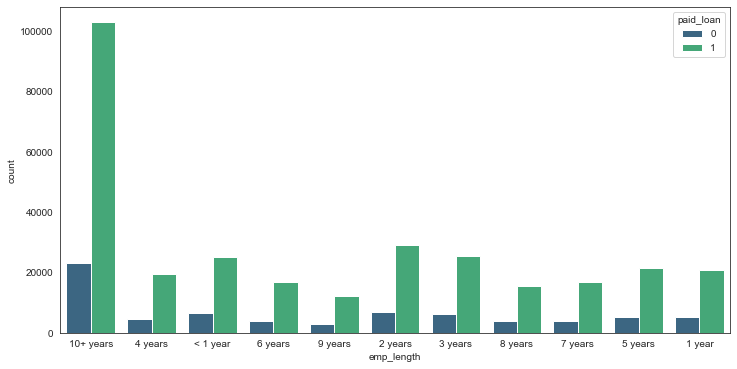

In [36]:
# understand if this variable can be a good predictor of the target variable
plt.figure(figsize=(12, 6))
sns.countplot(df['emp_length'], hue = 'paid_loan', data = df, palette='viridis')

In [37]:
# converting emp_length to float
dict_emp_length = {'10+ years':10, '6 years':6, '4 years':4, '< 1 year':0, '2 years':2,
       '9 years':9, '0 years':0, '5 years':5, '3 years':3, '7 years':7, '1 year':1,
       '8 years':8}
df['emp_length'].replace(dict_emp_length, inplace=True)

In [38]:
# the percentage of people that pay their loans by employment length
groupby_emp_len = df.groupby(by = 'emp_length')['paid_loan'].mean()
groupby_emp_len

emp_length
0.0     0.793128
1.0     0.800865
2.0     0.806738
3.0     0.804769
4.0     0.807615
5.0     0.807813
6.0     0.810806
7.0     0.805226
8.0     0.800240
9.0     0.799530
10.0    0.815814
Name: paid_loan, dtype: float64

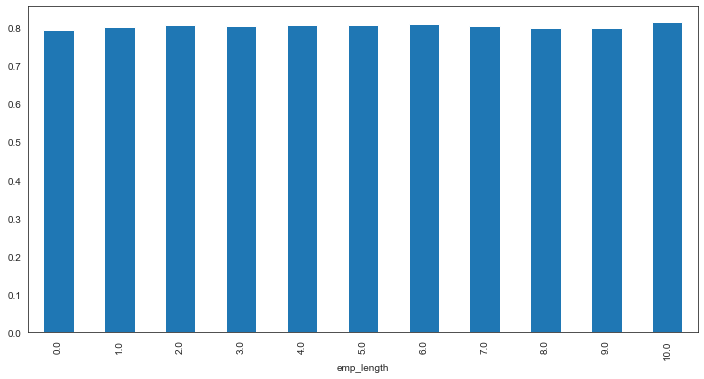

In [39]:
# create a plot
plt.figure(figsize=(12, 6))
groupby_emp_len.plot(kind='bar')

The proportion of payment rate is very similar across the different employment lengths. Let's drop this column.

In [40]:
# dropping the variable employment length since it does not give useful information
df = df.drop('emp_length', axis = 1)

#### Title

In [41]:
# take a look in the most common titles
df['title'].value_counts().sort_values(ascending=False).head(10)

Debt consolidation         152472
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
Major purchase               4769
Consolidation                3852
debt consolidation           3547
Business                     2949
Debt Consolidation Loan      2864
Name: title, dtype: int64

We can understand that this variable basically gives a short description of the purpose of the loan. In fact, we already have a Purpose variable with a lower granularity that will be easier to use. Let's just use Purpose in the future and drop the title variable.

In [42]:
# drop the title variable
df = df.drop('title', axis = 1)

#### Revolving line utilization rate

In [43]:
# let's check which information this feature gives us exactly
get_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [44]:
# let's recall the proportion of missing records for this feature
(df['revol_util'].isnull().sum() / len(df))*100

0.06969169002348306

Since only 0.07% of the observations have this feature as null we will drop the rows that have the missing data

In [45]:
# dropping the rows that are missing
df = df.dropna(subset=['revol_util'])

#### Number of Mortgage Accounts

In [46]:
# let's check the information on this feature
get_info('mort_acc')

Number of mortgage accounts.


In [47]:
# let's check which variables are the most correlated with Total Mortgage Accounts
df.corr()['mort_acc'].sort_values(ascending=False)

mort_acc                1.000000
total_acc               0.381205
annual_inc              0.236277
loan_amnt               0.222381
revol_bal               0.195063
installment             0.193752
open_acc                0.109440
paid_loan               0.073048
pub_rec_bankruptcies    0.027273
pub_rec                 0.011576
revol_util              0.007514
dti                    -0.025401
int_rate               -0.082656
Name: mort_acc, dtype: float64

We can conclude that the Total Accounts is highly correlated with the total number of mortgages accounts. Let's see what we can do

In [48]:
# basic statistics of this variable
df['total_acc'].describe()

count    395754.000000
mean         25.418467
std          11.886773
min           2.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         151.000000
Name: total_acc, dtype: float64

In [49]:
# create a group by total accounts and compute the mean of mortgage accounts
total_acc_avg = df.groupby(by = 'total_acc')['mort_acc'].mean()

In [50]:
# create a function to transform the feature
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [51]:
# transform the feature
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis = 1)

#### Public Record Bankruptcies

In [52]:
# since the number of missing observations is very little (~500) we will drop the records that have it
(df['pub_rec_bankruptcies'].isnull().sum() / len(df)) * 100

0.13518498865456824

In [53]:
df = df.dropna(subset=['pub_rec_bankruptcies'])

### Dummy / Categorical Variables

In [54]:
# let's check the string columns
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

#### Term

In [55]:
# let's take a look at the values on Term
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [56]:
# let's remove the word months and transform it to an integer
df['term'] = df['term'].apply(lambda x: x.split()[0])

In [57]:
# convert term to numeric
df['term'] = pd.to_numeric(df['term'])

#### Grade

In [58]:
# drop the variable Grade
df = df.drop(['grade'], axis = 1)

Since we have the same and more information on the variable sub-grade we will drop Grade feature and only use Sub-Grade.

#### Sub-grade, Verification Status, Application Type, Initial List Status & Purpose into dummies

In [59]:
# let's create a dummy variable
columns_dummies = ['sub_grade', 'verification_status',
                   'purpose', 'initial_list_status','application_type']
df = pd.get_dummies(df, columns=columns_dummies, drop_first=True)

#### Home Ownership

In [60]:
# let's take a look into the unique values
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [61]:
# let's group ANY and NONE into OTHER
df['home_ownership'] = df['home_ownership'].replace(['ANY', 'NONE'], 'OTHER')

In [62]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [63]:
# get dummies on this variable
df = pd.get_dummies(df, columns=['home_ownership'], drop_first=True)

#### Address

In [64]:
#let's extract the zip code from the address
df['zip_code'] = df['address'].apply(lambda x: x[-5:])

In [65]:
# let's take a look into the unique values of this new feature
df['zip_code'].value_counts().sort_values(ascending=False)

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [66]:
# since we cannot extract anything more from the address let's drop it
df = df.drop('address', axis = 1)

In [67]:
# get dummies in zip_code
df = pd.get_dummies(df, columns=['zip_code'], drop_first=True)

#### Issue Date

In [68]:
# let's remind us what information this feature gives us
get_info('issue_d')

The month which the loan was funded


In [69]:
# let's drop this column since is gives as information that we can't access
df = df.drop('issue_d', axis = 1)

#### Earliest Credit Line

In [70]:
# take a look on the info
get_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [71]:
# let's create a year date - when the credit line was opened
df['year'] = df['earliest_cr_line'].apply(lambda var: int(var[-4:]))

In [72]:
# let's drop the earliest_cr_line feature
df = df.drop('earliest_cr_line', axis = 1)

In [73]:
# let's understand the unique values of this variable
df['year'].value_counts().sort_values(ascending=False)

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1948        1
1944        1
Name: year, Length: 65, dtype: int64

## 3. Build the Model

#### Train Test Split

In [74]:
# import train test split
from sklearn.model_selection import train_test_split

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [75]:
# define our X and Y sets
x = df.drop('paid_loan', axis = 1).values

y = df['paid_loan'].values

In [76]:
# create our train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)

#### Normalize the Data

In [77]:
# import MinMax
from sklearn.preprocessing import MinMaxScaler

In [78]:
# create a scaler object
scaler = MinMaxScaler()

In [79]:
# fit the scaler to our x_train and transform it
x_train = scaler.fit_transform(x_train)

In [80]:
# transform the x_test set
x_test = scaler.transform(x_test)

#### Use TensforFlow to make predictions

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [82]:
x_train.shape

(316175, 78)

In [83]:
# time to build our model
NN = Sequential()

# build our network
NN.add(Dense(units=78, activation='relu')) # input layer
NN.add(Dropout(0.1)) # giving a 50% change of turning off a neuron

NN.add(Dense(units=55, activation='relu')) # hidden layer 1
NN.add(Dropout(0.1)) # giving a 30% change of turning off a neuron

# hidden layer
NN.add(Dense(units=25, activation='relu')) # hidden layer 2
NN.add(Dropout(0.1)) # giving a 20% change of turning off a neuron

# hidden layer
NN.add(Dense(units=15, activation='relu')) # hidden layer 2
NN.add(Dropout(0.1)) # giving a 20% change of turning off a neuron

NN.add(Dense(units=1, activation='sigmoid')) # output layer

# Compile model
NN.compile(loss='binary_crossentropy', optimizer='adam')

In [84]:
# let's define our early stop criteria
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience=20)

In [85]:
# let's define the tensorboard for later visualizations
from datetime import datetime

In [86]:
# define the log directory for tensorboard
log_dir = 'logs/fit'

timestamp = datetime.now().strftime("%Y-%m-%d--%H%M")
log_directory = log_dir + '/' + timestamp

In [87]:
# define the tensorboard
board = TensorBoard(log_dir=log_directory,histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1)

In [88]:
# let's fit our model
NN.fit(x = x_train, y = y_train, 
      epochs=100, callbacks=[early_stop, board],
      validation_data=(x_test, y_test), batch_size=256)




Train on 316175 samples, validate on 79044 samples
Epoch 1/100
316175/316175 [==============================] - 7s 22us/sample - loss: 0.3014 - val_loss: 0.2638
Epoch 2/100
316175/316175 [==============================] - 6s 20us/sample - loss: 0.2648 - val_loss: 0.2629
Epoch 3/100
316175/316175 [==============================] - 7s 23us/sample - loss: 0.2624 - val_loss: 0.2624
Epoch 4/100
316175/316175 [==============================] - 8s 25us/sample - loss: 0.2613 - val_loss: 0.2623
Epoch 5/100
316175/316175 [==============================] - 7s 22us/sample - loss: 0.2606 - val_loss: 0.2618
Epoch 6/100
316175/316175 [==============================] - 6s 18us/sample - loss: 0.2599 - val_loss: 0.2618
Epoch 7/100
316175/316175 [==============================] - 6s 18us/sample - loss: 0.2595 - val_loss: 0.2617
Epoch 8/100
316175/316175 [==============================] - 5s 17us/sample - loss: 0.2591 - val_loss: 0.2612
Epoch 9/100
316175/316175 [==============================] - 5s 17us/

In [89]:
model_hist = pd.DataFrame(NN.history.history)

<Figure size 720x432 with 0 Axes>

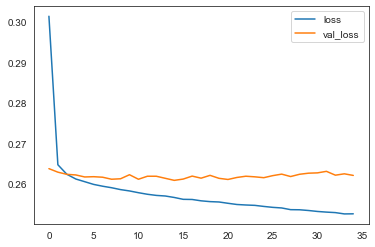

In [90]:
plt.figure(figsize=(10,6))
model_hist.plot()

In [91]:
predictions = NN.predict_classes(x_test)

In [92]:
from sklearn.metrics import confusion_matrix, classification_report

In [93]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

           0       0.97      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



[[ 6981  8677]
 [  203 63183]]


In [94]:
# visualize out model through tensorboard
# run this [tensorboard --logdir logs/fit/2020-04-25--1717/]